# Qiskit-IonQ Transpilation Bug

In [1]:
%%capture

%pip install -U qiskit qiskit_ionq matplotlib pylatexenc

## Imports

In [2]:
import os, qiskit_ionq
from getpass import getpass

# Before you begin, get your API key from https://cloud.ionq.com/settings/keys
# Ensure your API key is stored as "IONQ_API_KEY" in your local environment.

api_key = os.getenv("IONQ_API_KEY") or getpass("Enter your IonQ API key: ")
provider = qiskit_ionq.IonQProvider(api_key)

# We need to specify a backend, which is where the circuit will be executed. In
# this case we're using the `ionq_simulator`, but if you have QPU access you
# can specify it here to run the job on a QPU directly.

backend = provider.get_backend("ionq_qpu.aria-1", gateset="native")

## Quantum Circuit

In [3]:
from qiskit import QuantumCircuit

# Now we set up our circuit. In this case, we're creating a circuit with two
# qubits, applying an H gate to qubit-0, a CXGate to both, then measuring.

circuit = QuantumCircuit(2, name="Transpiled Qiskit Circuit")
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()

/opt/homebrew/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


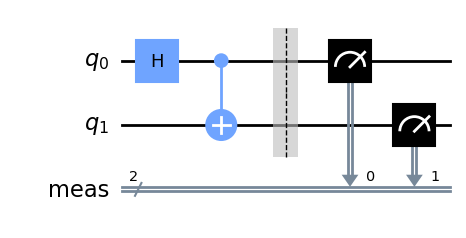

In [4]:
# Before submitting the job, we can visualize the circuit using draw().
# We're using matplotlib to create a pretty graphic, but draw() defaults to
# plaintext and supports other libraries like LaTeX.

circuit.draw("mpl")

## Transpiled Quantum Circuit

In [5]:
from qiskit import transpile

# We can transpile the circuit to Aria-1's native gateset
# https://github.com/qiskit-community/qiskit-ionq/blob/main/qiskit_ionq/helpers.py#L117-L128

transpiled_circuit = transpile(circuit, backend=backend)

TranspilerError: "Unable to translate the operations in the circuit: ['h', 'barrier', 'measure', 'cx'] to the backend's (or manually specified) target basis: ['barrier', 'snapshot', 'zz', 'measure', 'delay', 'reset', 'ms', 'gpi2', 'gpi']. This likely means the target basis is not universal or there are additional equivalence rules needed in the EquivalenceLibrary being used. For more details on this error see: https://qiskit.org/documentation/stubs/qiskit.transpiler.passes.BasisTranslator.html#translation_errors"

## Run Transpiled Circuit